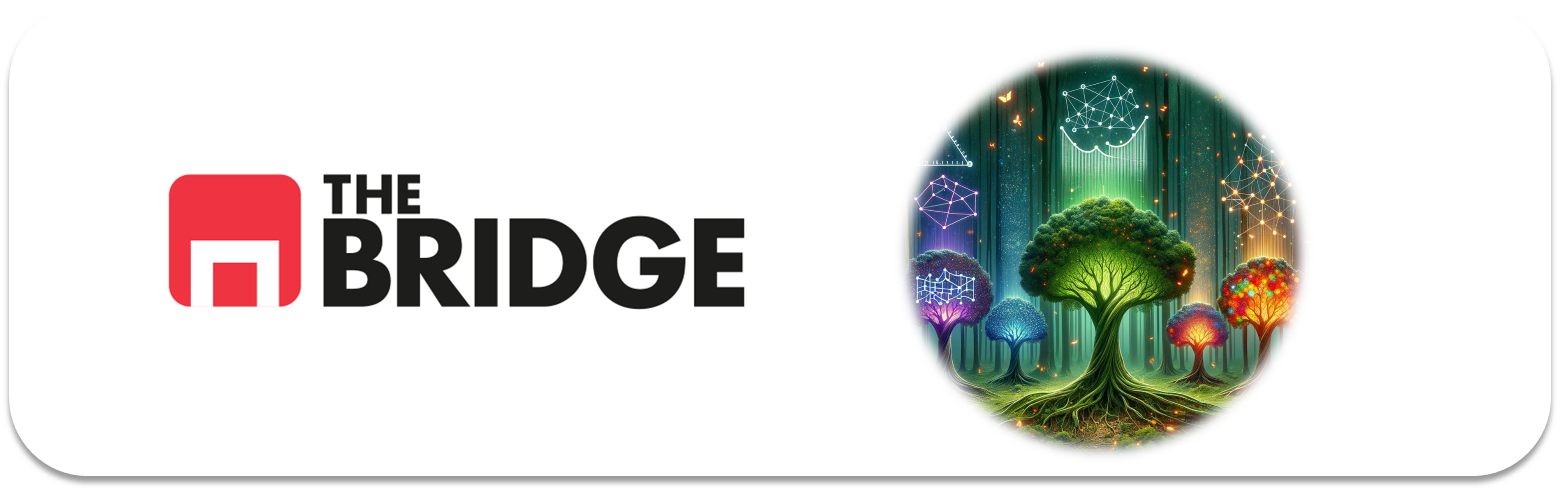

## Árboles de decisión: Regresión

Como siempre nos importamos las liberías necesarias y de nuevo puntualizar que si bien en estas sesiones dedicadas a ver cómo se crean los modelos con sklearn, no estamos haciendo el proceso completo de ML, eso no quiere decir que no se tengan que seguir cuando tratemos con árboles de decisión.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# para que la salida de este notebook sea estable en todas las ejecuciones
np.random.seed(42)

# Pintar!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### Dataset de partida

En esta ocasión no vamos a partir de un dataset específico sino que vamos a crear uno que nos permita ilustras la capacicades de los árboles para resolver problemas de regresión

In [2]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

Creamos una relación cuadrática entre la feature de entrada (X) y la y a la que añadimos ruido para que no sea perfecta (bueno para que no sea un función directa matemática)

Text(0, 0.5, 'target ($y$)')

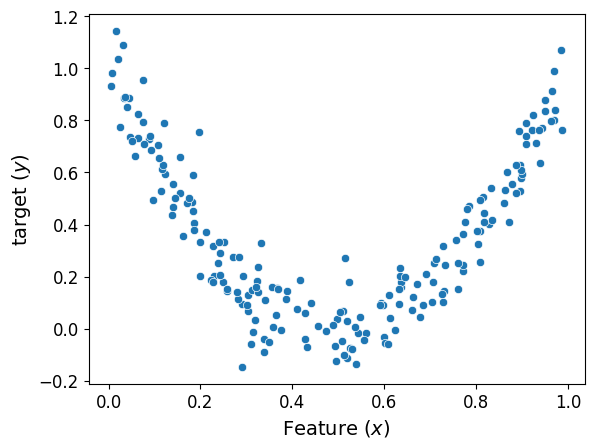

In [3]:
sns.scatterplot(x = X.flatten(), y = y.flatten())
plt.xlabel("Feature ($x$)")
plt.ylabel("target ($y$)")

### Instanciación y entrenamiento

En un proceso real, deberíamos separar train y test, como estas son sesiones ilustrativas no lo haremos.

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42) # De nuevo sólo un hiperparámetro, para controlar la profundidad o número de niveles del árbol
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tree_reg.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


MAE: 0.11551247800933064
RMSE: 0.14103255657883856


Probemos ahora con un árbol de algo más de profundidad

In [6]:
tree_reg_bis = DecisionTreeRegressor(max_depth=3, random_state=42) # De nuevo sólo un hiperparámetro, para controlar la profundidad o número de niveles del árbol
tree_reg_bis.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tree_reg_bis.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.08517327912899003
RMSE: 0.10516692756390263


Hemos mejorado pero tendríamos que haber porbado una validación cruzada para estar más seguros

In [8]:
from sklearn.model_selection import cross_val_score

level_2 = np.sqrt(-cross_val_score(tree_reg, X, y, cv = 5, scoring= "neg_mean_squared_error"))
level_3 = np.sqrt(-cross_val_score(tree_reg_bis, X, y, cv = 5, scoring = "neg_mean_squared_error"))

print("Arbol 2 niveles:", level_2.mean())
print("Arbol 3 niveles:", level_3.mean())

Arbol 2 niveles: 0.1703701065551966
Arbol 3 niveles: 0.1255889505623447


Por ahora podríamos "fiarnos" (pero sería mejor tener Test, ¿verdad?)

### Visualización del árbol

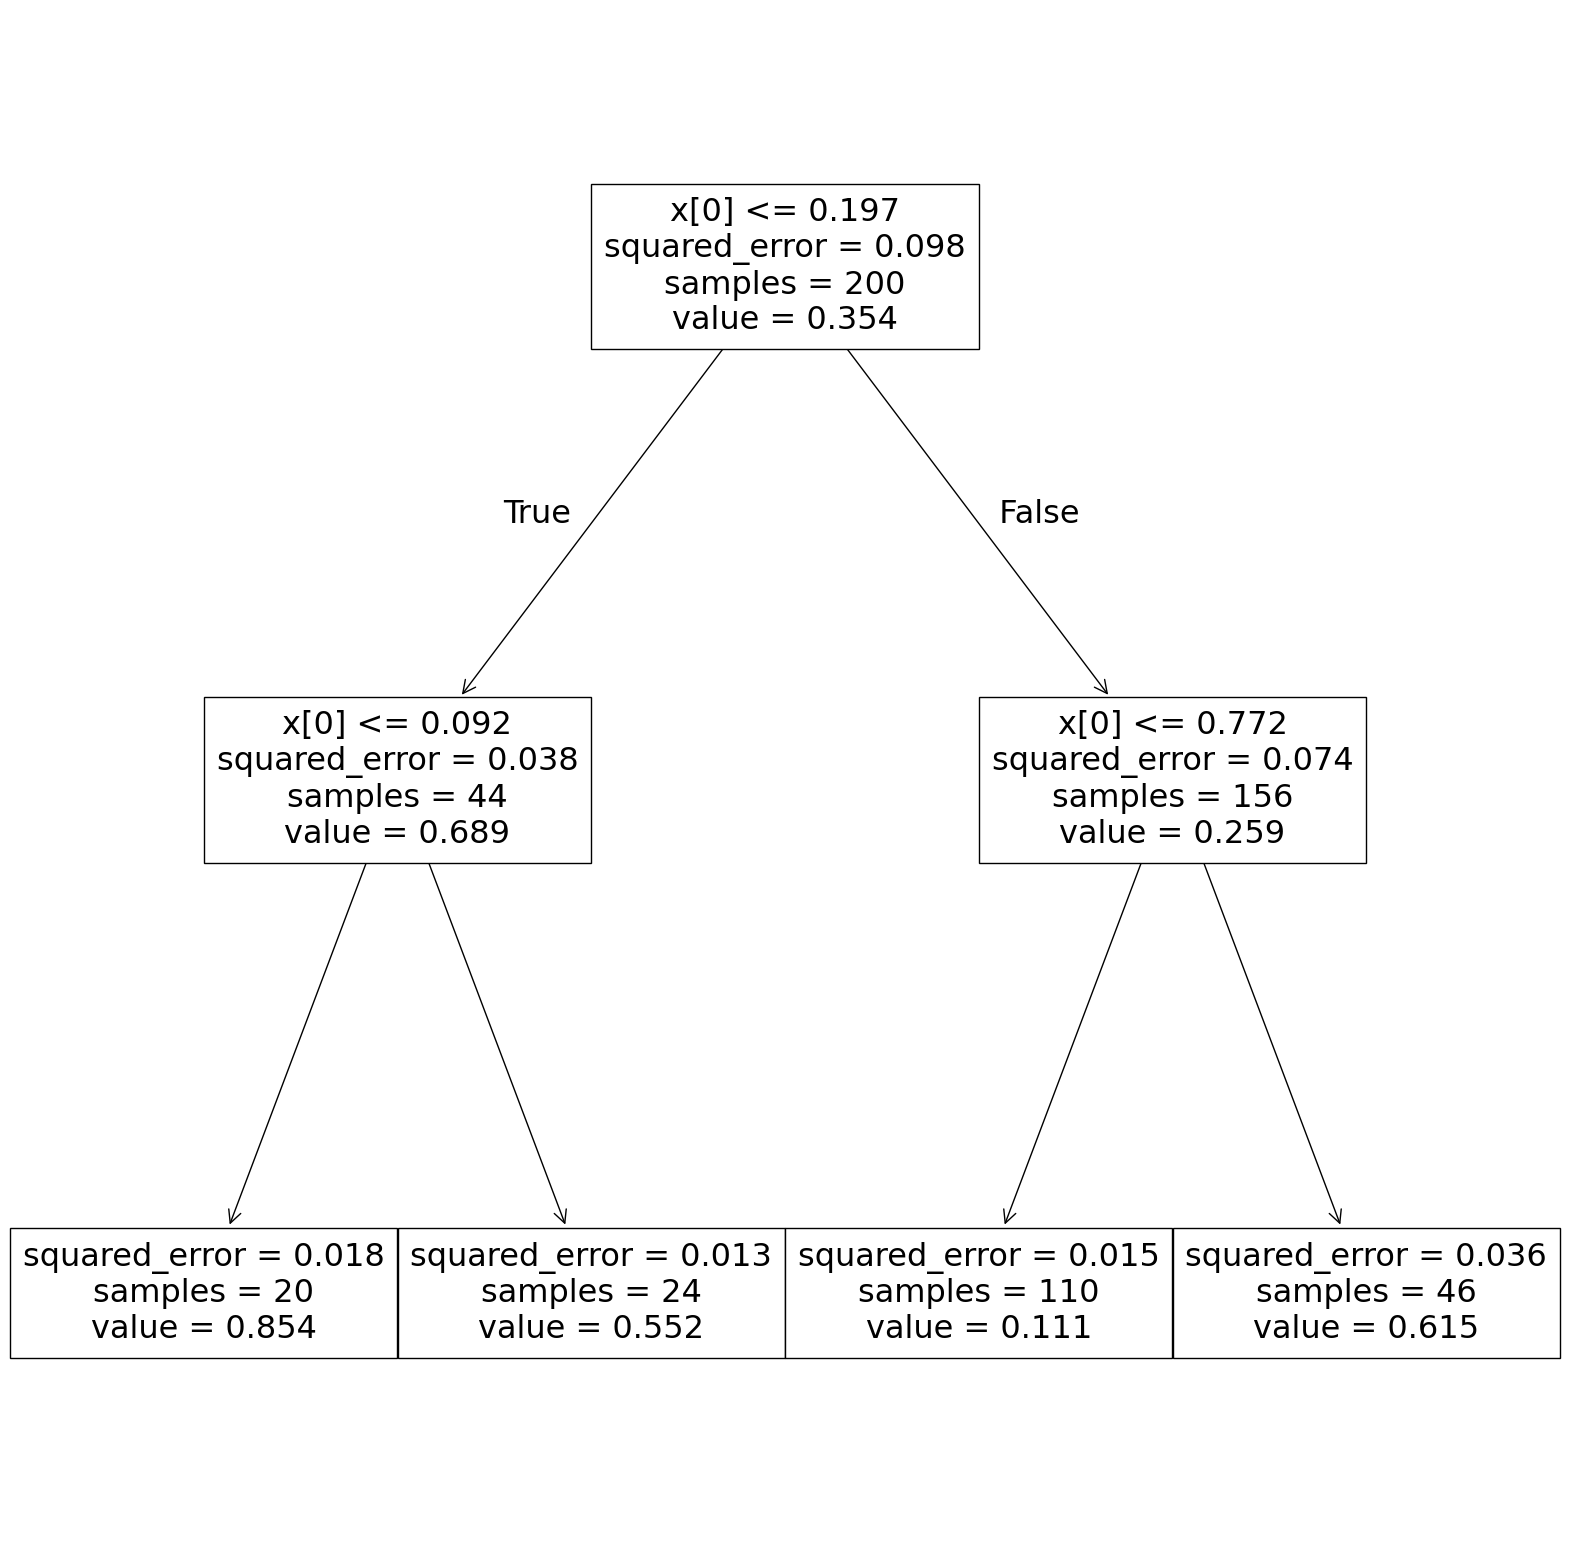

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(tree_reg);

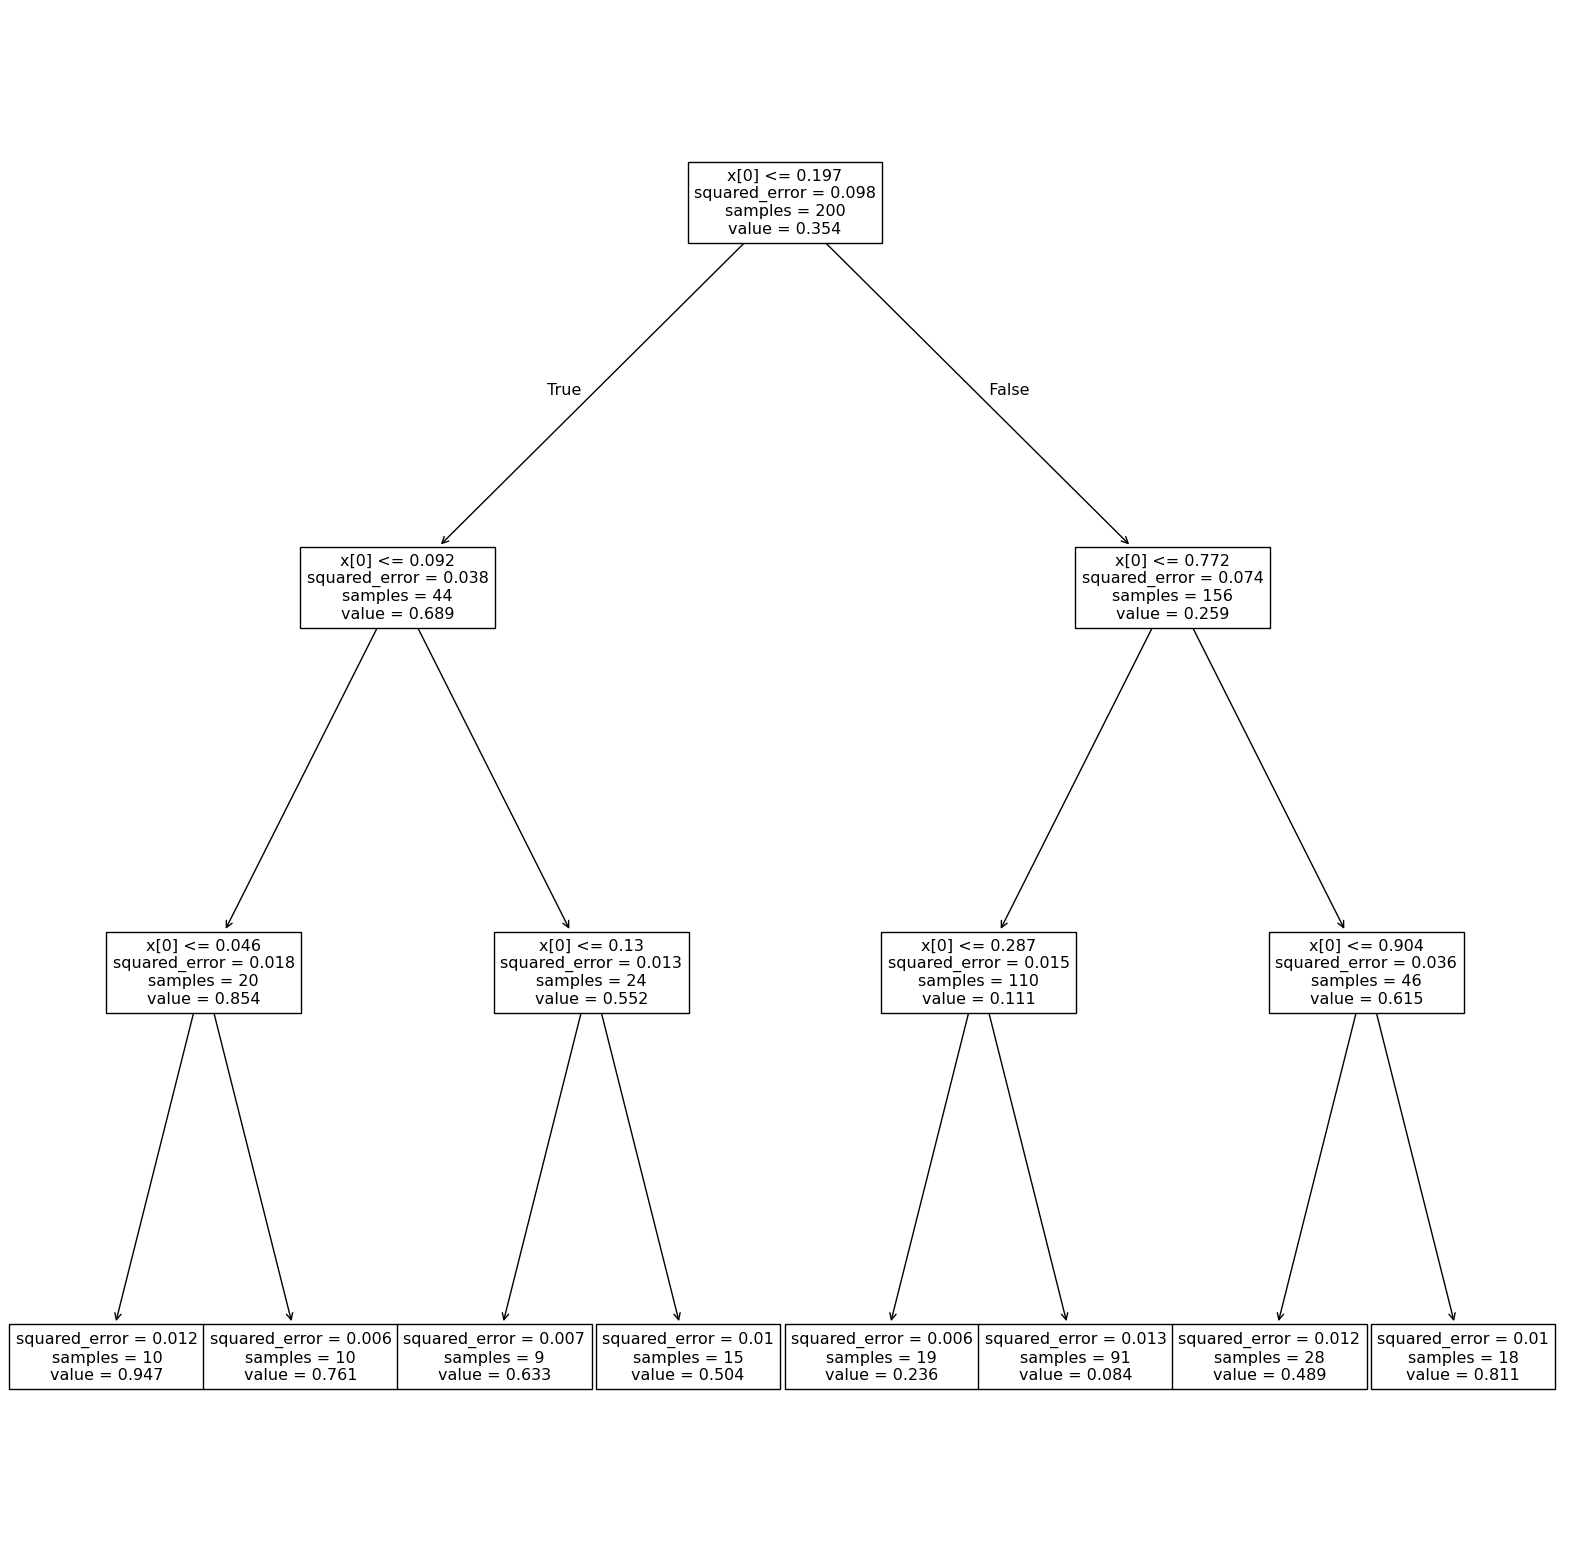

In [10]:

plt.figure(figsize=(20,20))
plot_tree(tree_reg_bis);

***

### Visualización del funcionamiento

Ahora vamos a definir una función que nos va a ayudar a ver gráficamente como se construyen esos umbrales que vimos en las sesiones teóricas que aplica el árbol de decisión cuando se enfrenta a problemas de regresión

In [11]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

Le paseremos el modelo y los datos y nos pintará todo lo necesario, veámoslo en acción

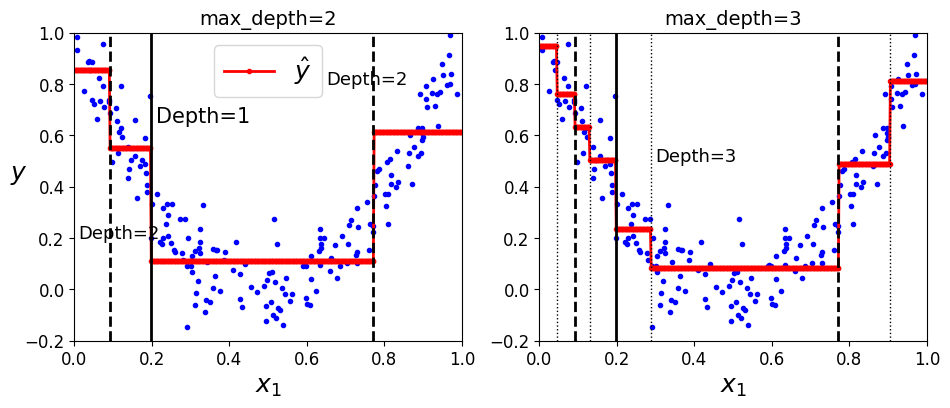

In [12]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=1", fontsize=15)
plt.text(0.01, 0.2, "Depth=2", fontsize=13)
plt.text(0.65, 0.8, "Depth=2", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg_bis, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=3", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

### Overfitting

Para termrminar, veamos la capacidad de hacer overfitting de los árboles, incluso los de regresión (recuerda el ejemplo del proceso de ML con el que comenzamos el módulo). Vamos a entrenar un modelo sin restricciones en el nivel de profundidad y otro sin restricciones en el nivel de profundidad pero sí en el mínimo número de elementos que tiene que tener una hoja.

In [13]:
tree_reg_limitless = DecisionTreeRegressor(random_state=42) # Sin restricciones en el número de niveles del árbol
tree_reg_min_leaf = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) # Restringidos los niveles a que no haya hojas con menos de 10 elementos
tree_reg_limitless.fit(X, y)
tree_reg_min_leaf.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

Veamos que tal se comportan sus métricas en train y luego en cross-validation:

**Sin límites, train error**

In [14]:
y_pred = tree_reg_limitless.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.0
RMSE: 0.0


Hmmm, sospechoso, doesn't it?

**Con minimo número de muestras por hoja, train error**

In [15]:
y_pred = tree_reg_min_leaf.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.06938429475117905
RMSE: 0.08772030436846634


Sensiblemente mejor que los entrenados al principio, pero.... Veamos con CV

**Score en validación cruzada**

In [16]:
level_2 = np.sqrt(-cross_val_score(tree_reg_limitless, X, y, cv = 5, scoring= "neg_mean_squared_error"))
level_3 = np.sqrt(-cross_val_score(tree_reg_min_leaf, X, y, cv = 5, scoring = "neg_mean_squared_error"))

print("Arbol a lo suyo:", level_2.mean())
print("Arbol con limite en las hojas:", level_3.mean())

Arbol a lo suyo: 0.1299083225118831
Arbol con limite en las hojas: 0.11286638978822128


Han empeorado, incluso el sin límites por debajo del que tiene las hojas restringidas a un mínimo y por debajo del arbol de tres niveles. Veamos como han escogido sus valores gráficamente:

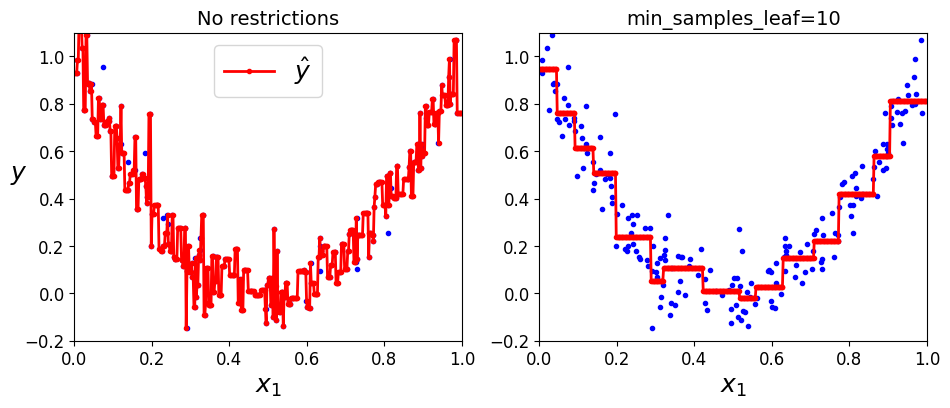

In [17]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg_limitless.predict(x1)
y_pred2 = tree_reg_min_leaf.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg_min_leaf.min_samples_leaf), fontsize=14);

El overfitting es clarísimo en la figura de la izquierda, mientras que en la derecha podemos ver un cierto sobreajuste pero una mejor selección de umbrales. La cuestión importante que se nos plantea con modelos como los árboles, que pueden ser muy interesantes, es ¿cuál es la combinación de hiperparámetros adecuada para obtener ese punto deseado de compromiso entre error de train y error de test, entre bias y variance?